In [2]:
import pandas as pd
import utils
import string

In [21]:
geo_df = pd.read_csv('data/Geo/district_crosswalk_small.csv')
averages_df = utils.mergeCsvsInDirectory('data/DailyAverages')
annual_df = averages_df.groupby(by=['year','unique_dist_id']).mean().reset_index()


In [26]:
named_df = annual_df.merge(geo_df, how='inner', on='unique_dist_id')

named_df = named_df[['year','distname_iaa', 'weightedAverageRainfall','weightedAverageTemperature']].rename(
    columns={
        'weightedAverageTemperature':'temperature',
        'weightedAverageRainfall':'rainfall',
        'distname_iaa': 'district'
    })

named_df['district'] = named_df['district'].apply(lambda x: x.capitalize())

In [27]:
# print(named_df.to_latex())

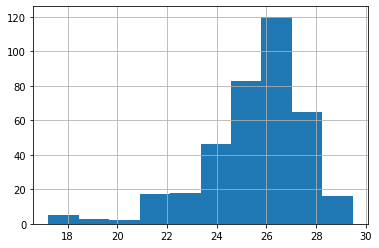

In [29]:
named_df['temperature'].hist()

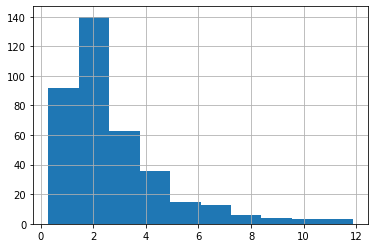

In [30]:
named_df['rainfall'].hist()